Importation des librairies

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

Téléchargement du jeu de données 

In [2]:
data = pd.read_csv("stars_train.csv")
X_test = pd.read_csv("stars_test.csv")

#On sépare les covariables et variable à prédire 
X = data[data.columns[0:-1]]
y = data[["label"]]

On vérifie s'il y a des données manquantes

In [3]:
(data.notna()==False).sum()

obj_ID      0
alpha       0
delta       0
u           0
g           0
r           0
i           0
z           0
redshift    0
label       0
dtype: int64

On regarde de type des différentes variables et leur valeurs

In [4]:
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,redshift,label
count,5.229500e+04,52295.000000,52295.000000,52295.000000,52295.000000,52295.000000,52295.000000,52295.000000,52295.000000,52295.00000
mean,1.237665e+18,179.950018,24.176598,22.162707,20.691976,19.676736,19.095594,18.769568,0.573293,0.56929
std,8.561793e+12,95.692902,19.417517,2.269335,2.054398,1.860475,1.752333,1.755465,0.726127,0.77704
min,1.237646e+18,0.013337,-17.636198,10.996230,10.498200,9.822070,9.469903,9.612333,-0.009971,0.00000
25%,1.237659e+18,129.158091,6.261014,20.398010,19.012810,18.176300,17.764080,17.489495,0.061434,0.00000
50%,1.237664e+18,182.750060,23.289472,22.314630,21.190710,20.164010,19.419960,19.009600,0.434668,0.00000
75%,1.237670e+18,236.194344,39.359462,23.785235,22.187810,21.069815,20.391470,19.893945,0.691771,1.00000
max,1.237681e+18,359.999615,83.000519,30.660390,31.602240,29.571860,30.250090,28.238290,7.011245,2.00000


On remarque que le jeu de données est composé de: 
- Co-variables quantitatives 
- Variable à prédire qualitative à trois niveaux 
- obj_ID ne doit pas être prise en compte dans l'analyse
- Variable à prédire qualitative à trois niveaux 

<Axes: >

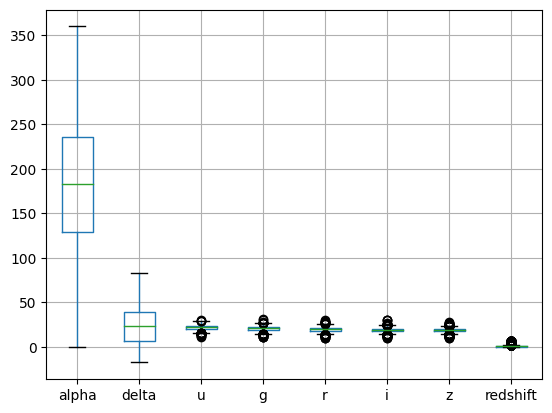

In [5]:
data[data.columns[1:-1]].boxplot()

Normaliser les valeurs ?
- possible argument : pas du tout les mêmes échelles/ unités.
- Faire un boxplot des modalités de y en fonction de chaque covariable.

On constate que la plupart des variables regroupe des valeurs entre [0,50] avec une faible dispersion sauf pour alpha (qui tient des valeurs entre [0,350]) et redshift qui compte avec des valeurs entre [0,7].  

On analyse la corrélation entre variables

In [6]:
data[data.columns[1:-1]].boxplot()

<Axes: >

Normaliser les valeurs ?
- possible argument : pas du tout les mêmes échelles/ unités.
- Faire un boxplot des modalités de y en fonction de chaque covariable.

On pourrait créer une fonction pour automatiser les tests de méthodes. (Voir TP)

In [7]:
#boxplot des modalités de y en fonction de chaque covariable

X = data[data.columns[1:-1]]
y = data[['label']]


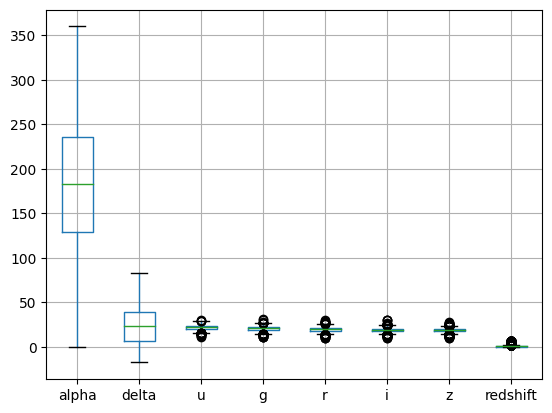

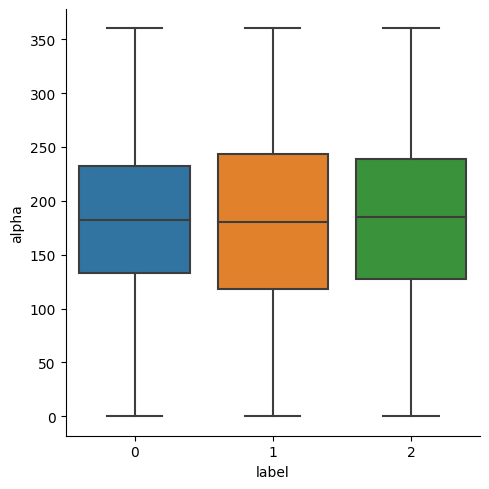

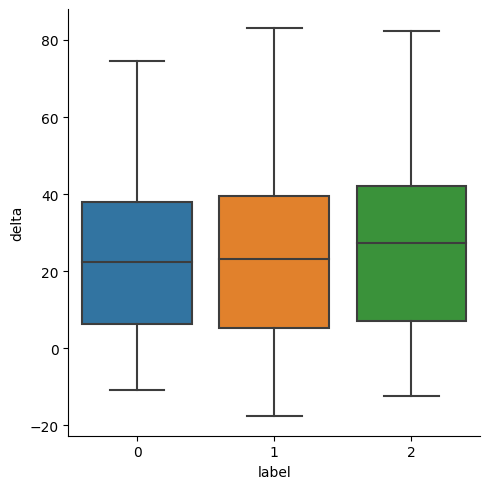

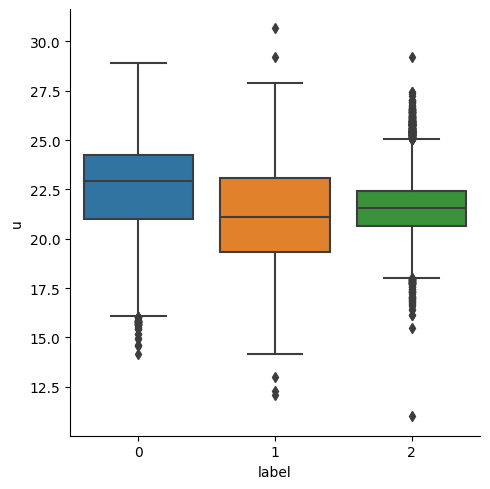

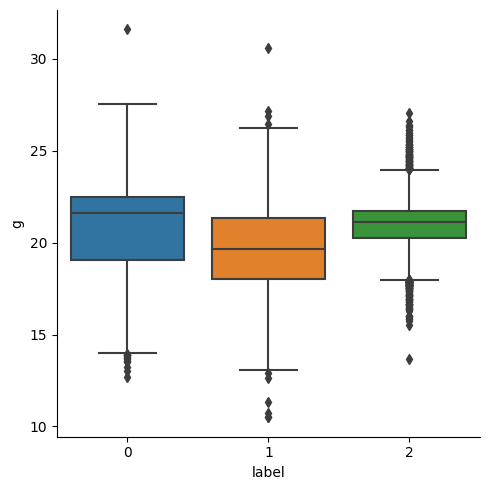

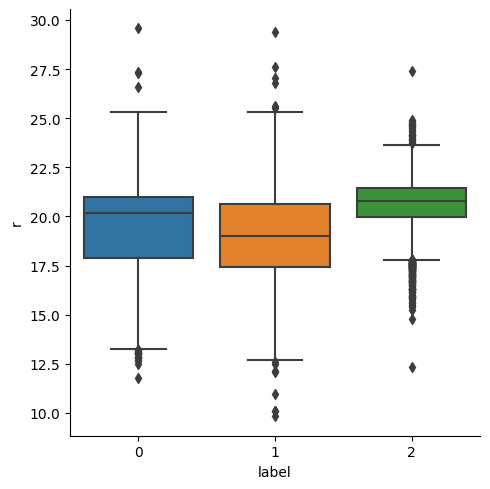

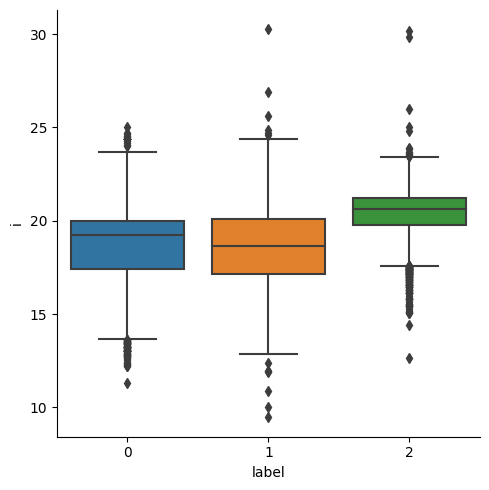

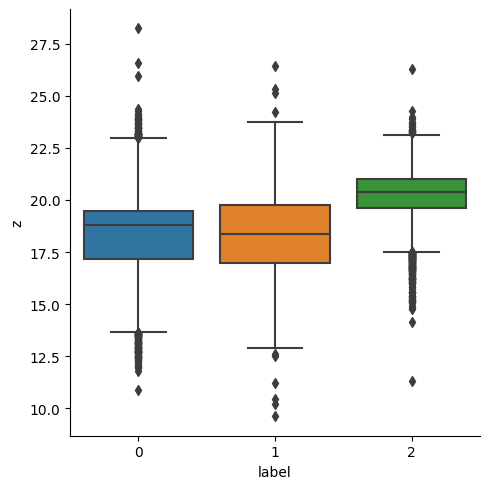

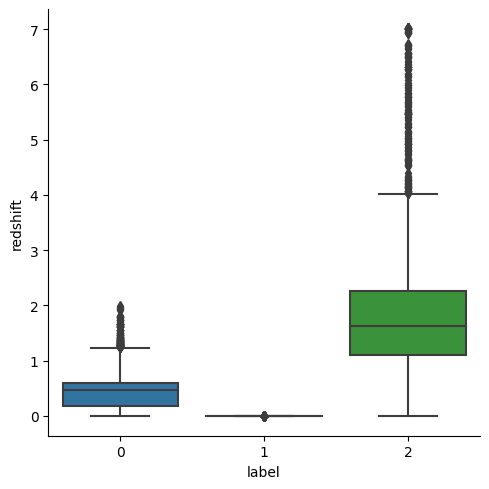

In [8]:
for covariable in data.columns[1:-1]:
    sns.catplot(x='label', y= covariable, data=data[data.columns[1:]], kind='box')
    plt.show()


StandardScaler (Z-score normalization) :

    Cette méthode soustrait la moyenne de chaque variable et divise par l'écart-type, ce qui rend la distribution de chaque variable centrée autour de zéro avec une variance de 1.

-RobustScaler pour rendre les données robustes aux valeurs aberrantes.
-QuantileTransformer, utile lorsque les données ne sont pas normalement distribuées.

In [9]:
#On choisit d'utiliser StandardScaler d'abord
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normed = scaler.fit_transform(X)

In [10]:
from sklearn.decomposition import PCA
n_components = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_normed[:,0:-1])

explained_variance = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante :", explained_variance)



Variance expliquée par chaque composante : [0.61245996 0.16061468]


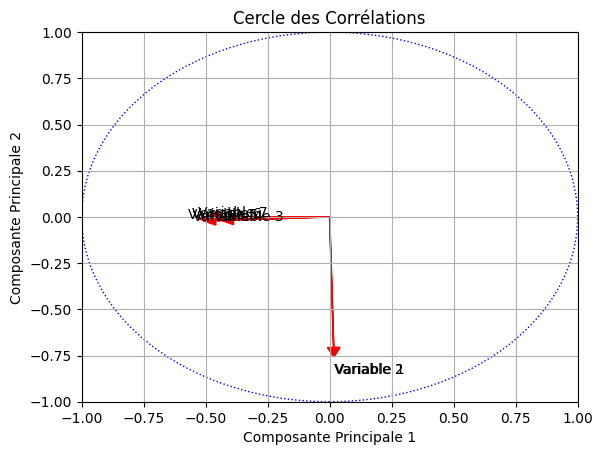

In [11]:
# Obtenir les composantes principales et les vecteurs propres (loadings)
components = pca.components_
explained_variance = pca.explained_variance_ratio_

# Créer un cercle des corrélations
fig, ax = plt.subplots()
circle = plt.Circle((0, 0), 1, fill=False, color='blue', linestyle='dotted')
ax.add_artist(circle)

for i, (x, y) in enumerate(zip(components[0, :], components[1, :])):
    ax.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, fc='red', ec='red')
    plt.text(x * 1.2, y * 1.2, f'Variable {i+1}', color='black')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Cercle des Corrélations')
plt.grid(True)
plt.show()


In [12]:
from sklearn.model_selection import train_test_split

# Supposons que X soit votre ensemble de données et y soit vos étiquettes cibles (si elles existent)
X_train, X_test, y_train, y_test = train_test_split(X_normed, y, test_size=0.2, random_state=42)


TypeError: Singleton array 0.0004151687251350289 cannot be considered a valid collection.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Créez une instance du modèle de régression logistique
model = LogisticRegression(solver='lbfgs', multi_class='multinomial', class_weight= 'balanced')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

#solver = 'lbfgs' :  Il s'agit d'un autre solveur basé sur des méthodes quasi-Newton,
#spécialement conçu pour la régression logistique multinomiale. Il est similaire à 'newton-cg' mais 
#peut être plus adapté aux ensembles de données de taille moyenne à grande.

#multi_class = 'multinomial' : Cette approche traite le problème de classification multiclasses 
#comme une seule tâche et utilise la fonction softmax pour attribuer des probabilités à chaque classe. 
#Scikit-learn prend en charge cette approche via la classe 

c:\Users\nafis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nafis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Il faudrait choisir une métrique pour évaluer nos modèles. On pourrait aussi faire une régression naïve pour voir ce que ça donne.

In [13]:
#Les métriques proposées : Precision, Recall, F1, Accuracy, ROC/AUC, matrice de confusion

#Celle qu'on choisit : ici on va faire un calcul d'Accuracy, il faut se renseigne sur les besoin de la
#tâche pour choisir une métrique adaptée.

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

#moins bon avec weight class balanced mais on a aussi une non convergence du modele, il faudrait augmenter
#le nombre max d'iterations ou changer de solver.

NameError: name 'y_test' is not defined

In [14]:
model2 = LogisticRegression(solver='newton-cg', multi_class='multinomial', class_weight= 'balanced')
model2.fit(X_train,y_train)
y2_pred = model2.predict(X_test)

#toujours un pb de convergence : augmenter max_iter, changer de solver, ajouter un paramètre de complexité.


NameError: name 'LogisticRegression' is not defined

In [15]:
print(accuracy_score(y_test, y2_pred))

NameError: name 'y_test' is not defined

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train)
y_pred = le.transform(y_pred)
y_test = le.transform(y_test)

NameError: name 'y_train' is not defined

In [17]:
from sklearn.metrics import f1_score

print(f1_score(y_test,y_pred, average = 'weighted'))

#vérifier pourquoi on ne peut pas utiliser le f1 score.

NameError: name 'y_test' is not defined

On constate que la plupart des variables regroupe des valeurs entre [0,50] avec une faible dispersion sauf pour alpha (qui tient des valeurs entre [0,350]) et redshift qui compte avec des valeurs entre [0,7].  

On analyse la corrélation entre variables

In [66]:
sns.heatmap(data.corr(), annot = True, fmt = ".2f")

<Axes: >

On remarque: 

- Pas vraiment de corrélations négatives sur la barre en légende
- Corrélation positive entre plusieurs co-variables: g, r, i, z
- le label semble être:     
    - plus ou moins corrélé au redhift
    - relativement corrélé avec r, i, z
    - relativement corrélé négativement avec g

--> soit les covariables sont fortement corrélées positivement soit elles sont plutôt indépendantes. Les covariables corrélées entre elles sont les u, g, r, i, z. Il serait intéressant de regarder à quoi cela correspond pour essayer d'expliquer pourquoi on peut remarquer ces corrélations.

In [68]:
g= sns.pairplot(data,hue = 'label', diag_kind= 'hist',vars=data.columns,plot_kws=dict(alpha=0.5), diag_kws=dict(alpha=0.5))
plt.show()

KeyboardInterrupt: 

Avec ce type de graphe on peut réussir à comprendre le jeu de données à plusieurs niveaux: 

- Label: on a pas une répartition uniforme des catégories. En effet on peut voir qu'il y a beaucoup plus d'individus de catégorie 0. 
- Avec les graphes opposant les variables une à une et colorant les individus en fonction de leur classe, on peut analyser s'il y a une jj

Trouver un moyen d'équilibrer l'étude : 
- créer des individus artificiels pour remplir les autres catégories.
- weight_class = 'balanced'.

In [70]:
X_sub = pd.read_csv('stars_test.csv')
object_id = np.loadtxt('obj_ID.csv')
del X_sub['obj_ID']
object_id.shape

(25758,)

In [71]:
X_sub.head()

,alpha,delta,u,g,r,i,z,redshift
0,44.705691,33.993858,19.51527,18.40343,18.03881,17.87942,17.85744,-0.000176
1,132.101279,31.861286,25.98949,22.63758,21.74283,20.60178,19.82636,0.699970
2,338.396724,24.538435,24.28447,24.52921,22.09690,20.87217,19.96444,-0.000218
3,322.095785,0.677901,23.73190,22.65734,22.27631,22.68605,21.90804,0.471956
4,242.657170,12.065346,21.43320,21.30294,20.41931,19.64881,19.24359,0.647077


In [72]:
y1_sub = model.predict(X_sub)
y2_sub = model2.predict(X_sub)

c:\Users\nafis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\nafis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [75]:
submission = {'obj_ID': object_id, 'pred': y1_sub}
submission = pd.DataFrame(submission)
X_sub.shape

(25758, 8)

In [74]:
submission.to_csv('Méthode_reglog_lbfgs_balencedClass_0410.csv', sep=',', index=False)

In [19]:
import pandas as pd
import numpy as np
from datetime import datetime

def create_submission(model,name, output_dir='.'):
    X_sub = pd.read_csv('stars_test.csv')
    object_id = np.loadtxt('obj_ID.csv')
    
    if 'obj_ID' in X_sub.columns:
        del X_sub['obj_ID']

    y_sub = model.predict(X_sub)

    submission = {'obj_ID': object_id, 'pred': y_sub}
    submission_df = pd.DataFrame(submission)
    
    # Générer le nom du fichier de sortie basé sur la date
    current_date = datetime.now().strftime('%d_%m')
    output_filename = f'submission_{name}_{current_date}.csv'
    
    # Enregistrer le dataframe de soumission au format CSV
    output_path = f'{output_dir}/{output_filename}'
    submission_df.to_csv(output_path, sep=',', index=False)
    
    print(f'Submission enregistrée sous le nom : {output_filename}')



In [20]:
create_submission(model = model,name =  'Méthode_reglog_lbfgs_balencedClass')

Submission enregistrée sous le nom : submission_Méthode_reglog_lbfgs_balencedClass_07_10.csv


c:\Users\nafis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
